In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("working dir:", workding_dir)

working dir: /Users/inflaton/code/engd/papers/DM-Fake-News-Detection


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/DM-Fake-News-Detection/.env


True

In [5]:
from llm_experiements.utils import *
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        "test": [
            "results/RF_metrics.csv",
            "results/SVM_metrics.csv",
            "results/Simple Neural Network_metrics.csv",
            "results/CNN_metrics.csv",
            "results/RNN_metrics.csv",
            "results/LSTM_metrics.csv",
            "results/BERT_metrics.csv",
            "results/RoBERTa_metrics.csv",
            "results/DistilBERT_metrics.csv",
        ],
    },
)
dataset

DatasetDict({
    test: Dataset({
        features: ['model', 'train-data', 'test-data', 'accuracy', 'precision', 'recall', 'f1_score', 'throughput'],
        num_rows: 54
    })
})

In [6]:
df = dataset["test"].to_pandas()
df_table_1 = df[
    (df["train-data"].isin(["original"]))
    & (df["test-data"].isin(["original"]))
].reset_index(drop=True)
df_table_1.drop(columns=["train-data", "test-data"], inplace=True)
df_table_1

,model,accuracy,precision,recall,f1_score,throughput
0,RF,0.949421,0.941531,0.942954,0.942242,1241.858254
1,SVM,0.969752,0.964205,0.966755,0.965478,1174.639419
2,Simple Neural Network,0.964628,0.964490,0.954288,0.959362,805.372583
3,CNN,0.977521,0.977558,0.970910,0.974223,836.196195
4,RNN,0.942810,0.949239,0.918398,0.933564,628.223363
5,LSTM,0.977851,0.980497,0.968644,0.974534,616.763462
6,BERT,0.994545,0.992093,0.995467,0.993777,196.916854
7,RoBERTa,0.993058,0.991695,0.992444,0.992069,139.358973
8,DistilBERT,0.994876,0.992841,0.995467,0.994152,201.317209


In [7]:
df_formatted = df_table_1.copy()
for col in df_table_1.columns[1:-1]:  # Format all except model and throughput
    df_formatted[col] = df_table_1[col].map(lambda x: f"{x:.4f}")
df_formatted["throughput"] = df_table_1["throughput"].map(lambda x: f"{x:.0f}")

# Display the formatted DataFrame
df_formatted

,model,accuracy,precision,recall,f1_score,throughput
0,RF,0.9494,0.9415,0.9430,0.9422,1242
1,SVM,0.9698,0.9642,0.9668,0.9655,1175
2,Simple Neural Network,0.9646,0.9645,0.9543,0.9594,805
3,CNN,0.9775,0.9776,0.9709,0.9742,836
4,RNN,0.9428,0.9492,0.9184,0.9336,628
5,LSTM,0.9779,0.9805,0.9686,0.9745,617
6,BERT,0.9945,0.9921,0.9955,0.9938,197
7,RoBERTa,0.9931,0.9917,0.9924,0.9921,139
8,DistilBERT,0.9949,0.9928,0.9955,0.9942,201


In [8]:
df_formatted.to_latex(
    "results/table_1.tex",
    index=False,
    caption="Performance metrics of the models on the original data",
    label="table:table_1",
)

In [9]:
# filter df to only include train-data in ["original", "combined"] and test-data in ["original", "rewritten"]
df = df[
    (df["train-data"].isin(["original", "combined"]))
    & (df["test-data"].isin(["original", "rewritten"]))
]
df

,model,train-data,test-data,accuracy,precision,recall,f1_score,throughput
0,RF,original,original,0.949421,0.941531,0.942954,0.942242,1241.858254
1,RF,original,rewritten,0.849091,0.819690,0.839819,0.829632,1353.110520
2,RF,combined,original,0.750744,0.651664,0.924443,0.764449,795.759793
3,RF,combined,rewritten,0.642645,0.558392,0.876086,0.682059,809.537066
6,SVM,original,original,0.969752,0.964205,0.966755,0.965478,1174.639419
7,SVM,original,rewritten,0.866116,0.893025,0.788440,0.837480,1238.908064
8,SVM,combined,original,0.964793,0.959592,0.959955,0.959773,738.638495
9,SVM,combined,rewritten,0.916529,0.905375,0.903665,0.904519,763.448425
12,Simple Neural Network,original,original,0.964628,0.964490,0.954288,0.959362,805.372583
13,Simple Neural Network,original,rewritten,0.797686,0.853102,0.649414,0.737452,871.427111


In [10]:
df.to_csv("results/all_metrics.csv", index=False)

In [11]:
df["model"] = df["model"].apply(
    lambda x: "Simple\nNeural Network" if x == "Simple Neural Network" else x
)

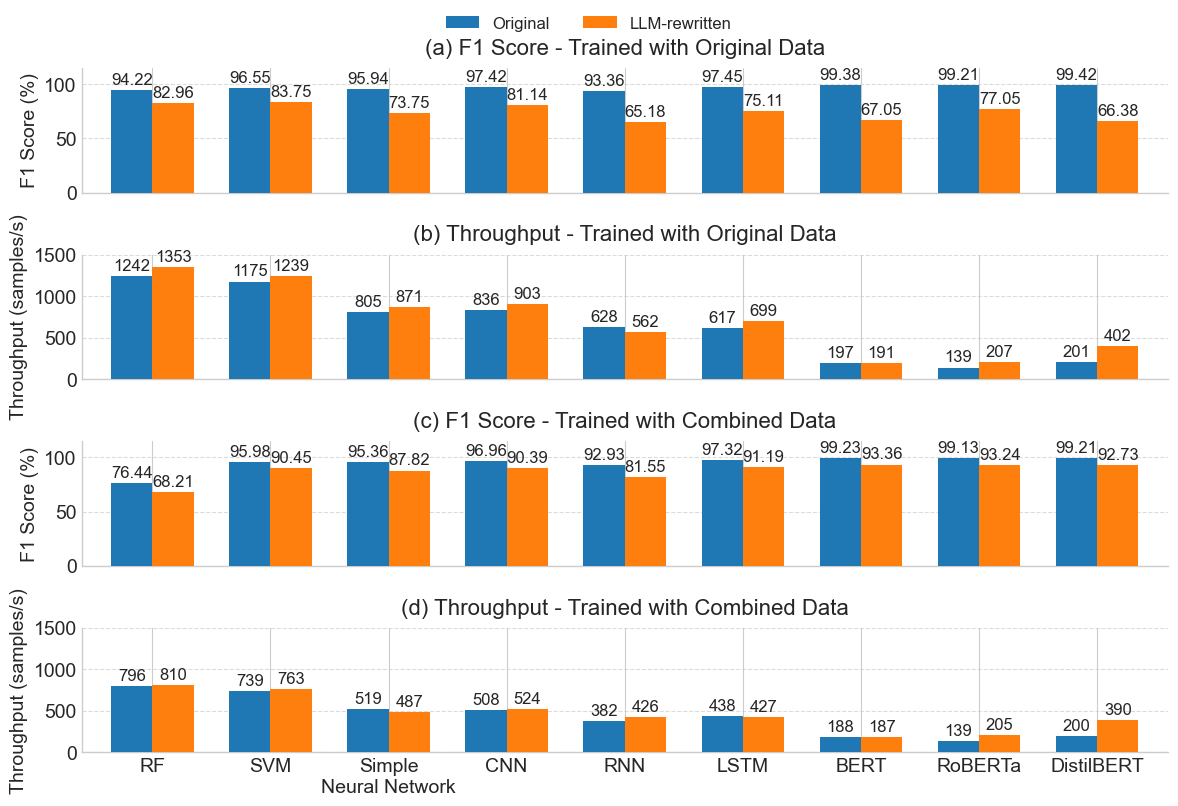

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame structure (adjust as needed)
# df = pd.read_csv('your_data.csv')
# Columns: model, train-data, test-data, accuracy, precision, recall, f1_score, throughput

# Desired model order
model_order = [
    'RF',
    'SVM',
    'Simple\nNeural Network',
    'CNN',
    'RNN',
    'LSTM',
    'BERT',
    'RoBERTa',
    'DistilBERT'
]

# Set a Seaborn style (feel free to try different ones)
plt.style.use("seaborn-v0_8-whitegrid")

# Increase overall font size
plt.rcParams.update({'font.size': 14})

# Each tuple: (train_data_value, metric_column, subplot_title)
# Update titles to include the metric name
plot_params = [
    ('original', 'f1_score',   '(a) F1 Score - Trained with Original Data'),
    ('original', 'throughput', '(b) Throughput - Trained with Original Data'),
    ('combined', 'f1_score',   '(c) F1 Score - Trained with Combined Data'),
    ('combined', 'throughput', '(d) Throughput - Trained with Combined Data'),
]

# Prepare figure and axes
fig, axes = plt.subplots(
    nrows=len(plot_params), 
    ncols=1, 
    figsize=(12, 8),    # wider and taller for better readability
    sharex=False         # we only share x in the last two subplots if needed
)

# Custom colors for the bars (original vs. rewritten)
colors = ["#1f77b4", "#ff7f0e"]  # a common color scheme (blue, orange)

for idx, (train_val, metric, title) in enumerate(plot_params):
    ax = axes[idx]
    
    # Filter to the desired training data
    subset = df[df['train-data'] == train_val].copy()
    
    # Convert F1 scores to percentages
    if metric == 'f1_score':
        subset['f1_score'] = subset['f1_score'] * 100
    
    # Pivot: rows = model, columns = test-data, values = metric
    pivoted = subset.pivot(index='model', columns='test-data', values=metric)
    
    # Reindex to ensure a consistent model order
    pivoted = pivoted.reindex(index=model_order)
    # Reindex columns to ensure [original, rewritten]
    pivoted = pivoted.reindex(columns=['original', 'rewritten'])
    
    # Plot grouped bar chart
    pivoted.plot(
        kind='bar', 
        ax=ax, 
        color=colors, 
        width=0.7,         # slightly narrower bars
        legend=False,      # We'll manage legend manually
        zorder=3           # So bars appear above the grid
    )
    
    # Set title
    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel('')
    
    # Axis labels
    if metric == 'throughput':
        ax.set_ylabel("Throughput (samples/s)", fontsize=14)
        ax.set_ylim(0, 1500)  # Adjust as needed
    else:
        ax.set_ylabel("F1 Score (%)", fontsize=14)
        ax.set_ylim(0, 115)   # Adjust as needed
    
    # Add numeric labels on top of each bar
    for container in ax.containers:
        ax.bar_label(
            container, 
            fmt='%.0f' if metric == 'throughput' else '%.2f', 
            label_type='edge', 
            padding=2,
            fontsize=12
        )
    
    # Remove top and right spines for a cleaner look
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Light grid lines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)
    
    # X-axis labels
    if idx < len(plot_params) - 1:
        # Hide x tick labels for all but the last subplot
        ax.set_xticklabels([])
    else:
        # Adjust label rotation for better readability
        plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

# --- Custom Legends ---
# We can add a single legend at the top of the figure or separate legends. 
# Here is how to do a single legend at the top:
labels = ['Original', 'LLM-rewritten']
fig.legend(
    labels=labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False,
    fontsize=12
)

# If you prefer separate legends in the first subplot, uncomment below and comment out the single legend block above:
"""
handles, labels_ax = axes[0].get_legend_handles_labels()
axes[0].legend([handles[0]], ['Original'], loc='upper left', fontsize=12)
axes[0].legend([handles[1]], ['Rewritten'], loc='upper right', fontsize=12)
"""

plt.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
